# HW 3



$\textbf{Yagiz Savas}$ 

$\textbf{Question 3.6a)}$

Prove $\lVert x \rVert'= \sup_{\lVert y \rVert =1} \lvert y^\star x \rvert$ is a valid norm.

i) 

$\lVert x \rVert' =\sup_{\lVert y \rVert =1} \lvert y_1x_1+y_2x_2+..+y_nx_n\rvert \geq 0 $

 $ x_i=0 \ \forall i=1,2,..,n \implies \lVert x \rVert'=0$
 
 ii) 
 
 $\begin{align*}
 \lVert x+z \rVert'= & \sup_{\lVert y \rVert =1} \lvert y^\star(x+z)\rvert \\
 =&\sup_{\lVert y \rVert =1} \lvert y^\star x+y^\star z\rvert \\
 \leq & \sup_{\lVert y \rVert =1} (\lvert y^\star x\rvert +\lvert y^\star z\rvert )\\
 =& \sup_{\lVert y \rVert =1} \lvert y^\star x\rvert+ \sup_{\lVert y \rVert =1} \lvert y^\star z\rvert \\
 =& \lVert x\rVert'+\lVert z \rVert'\end{align*}$
 
 iii)
 
$ \begin{align*}
\lVert \alpha x \rVert'=& \sup_{\lVert y \rVert =1} \lvert y^\star(\alpha x)\rvert \\
=&\sup_{\lVert y \rVert =1} \lvert (\alpha)y^\star x\rvert \\
=&  \sup_{\lVert y \rVert =1}\lvert \alpha \rvert \lvert y^\star x\rvert \\
=&  \lvert \alpha \rvert \sup_{\lVert y \rVert =1} \lvert y^\star x\rvert \\
=& \lvert \alpha \rvert \lVert x \rVert'
 \end{align*}$
 
$\textbf{Question 4.5}$

$A \in \mathbb{R}^{m \times n} \iff A^\star = A^T$

We know that $\Sigma \in \mathbb{R}^{m \times n}$

$A^\star A= V\Sigma^2 V^\star = (V^\star)^T\Sigma^2 V^\star= A^TA \implies V=(V^\star)^T \implies V^T=V^\star \implies V \in \mathbb{R}^{n \times n}$
 
$A A^\star= U\Sigma^2 U^\star = U \Sigma^2 U^T= AA^T \implies U^T=U^\star \implies U \in \mathbb{R}^{m \times m}$
 
$\textbf{Question 5.3}$

a)

$A=U\Sigma V^\star$ $\implies$ $ A^\star A=V\Sigma^2 V^\star $

Since $A^\star A$ is symmetric non-singular matrix, its eigenvectors can be calculated by using power and inverse power methods. Power method is used to find the eigen direction with largest eigenvalue whereas, inverse power method is used to find with smallest one. These methods does not provide eigenvalues of A but provide square of its singular values. Additionally, they establish $V$ matrix whose columns are orthonormal to each other. 
Then by calculating columns of U, $u_i$, as $Av_i/\sigma_i$ decomposition is completed.





In [2]:
clear all
A=[-2 11; -10 5]; % A matrix
err_1=1; % initialize eigenvector errors
err_2=1;
v_1=[0;1]; % initialize eigenvectors 
v_2=[1;0];
w_1=[0;0]; % define vectors which is used in power iterations
w_1=[0;0];
square=A'*A; % calculate square of A


% Calculate singular values and eigenvectors of A by using power and inverse power methods. 
while (err_1>(10^-5) && err_2>(10^-5)) 
    %power method to find square of largest singular value 
    w_1=square*v_1;
    v_1=w_1/(w_1(1)^2+w_1(2)^2)^(1/2);
    lambda_1=(v_1'*square*v_1)/(v_1'*v_1);
    error_matrix_1=abs(lambda_1*v_1-square*v_1);
    err_1=(error_matrix_1(1)^2+error_matrix_1(2)^2)^(1/2);

    %inverse power method to find square of smallest singular value
    w_2=square\v_2;
    v_2=w_2/(w_2(1)^2+w_2(2)^2)^(1/2);
    lambda_2=(v_2'*square*v_2)/(v_2'*v_2);
    error_matrix_2=abs(lambda_2*v_2-square*v_2);
    err_2=(error_matrix_2(1)^2+error_matrix_2(2)^2)^(1/2);
endwhile

V=[v_1 v_2]; % Compose V vector 
sigma=diag([sqrt(lambda_1),sqrt(lambda_2)]); % Compose Sigma vector
U_1=A*V(:,1)/sigma(1,1);
U_2=A*V(:,2)/sigma(2,2);
U=[U_1 U_2]; % Compose U vector

%output (Note: Sorry for bad looking. I could not find a better way for representation.)
disp('Singular values are :');
disp(sigma(1,1)); 
disp(sigma(2,2));
disp('Left singular matrix U, is: ');
disp(U);
disp('Right singular matrix V, is: ');
disp(V)

Singular values are :
 14.142
 7.0711
Left singular matrix U, is: 
   0.70711   0.70711
   0.70711  -0.70711
Right singular matrix V, is: 
  -0.60000   0.80000
   0.80000   0.60000


b)

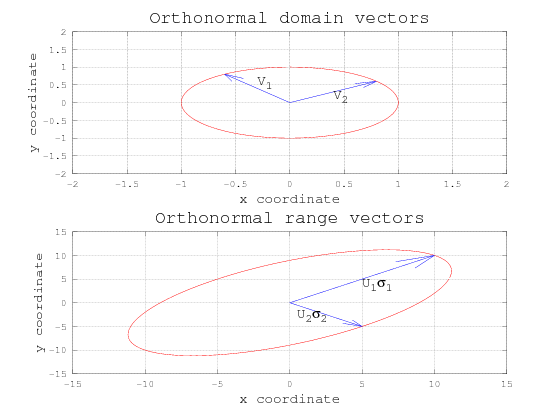

In [3]:
%Plot a unit circle
N=200;
a=cos(2*pi/N);b=sin(2*pi/N); % Rotation terms
x(N)=0; y(N)=1; % Predimension arrays
x(1)=0; y(1)=1; % Initial values
for k=1:N-1
x(k+1)=a*x(k)+b*y(k);
y(k+1)=a*y(k)-b*x(k);
endfor

%Plot basis vectors for domain space (eigenvectors for this case !)
subplot(2,1,1)
plot(x,y,'r')
hold on
grid on 
title('Orthonormal domain vectors','FontSize', 18 )
xlabel('x coordinate','FontSize', 14 )
ylabel('y coordinate','FontSize', 14 )
set(gca,'xlim',[-2 2],'ylim', [-2 2])
compass(v_1(1),v_1(2))
text(v_1(1)/2,v_1(2)/2+0.2,'V_1','FontSize', 14 );
compass(v_2(1),v_2(2))
text(v_2(1)/2,v_2(2)/2-0.1,'V_2','FontSize', 14 );

%Plot corresponding basis vectors for range space
subplot(2,1,2);
Data=[x;y];
Transform=A*Data;
plot(Transform(1,:),Transform(2,:),'r');
hold on
grid on
title('Orthonormal range vectors','FontSize', 18 )
xlabel('x coordinate','FontSize', 14 )
ylabel('y coordinate','FontSize', 14 )
compass(U_1(1)*sigma(1,1),U_1(2)*sigma(1,1));
text(U_1(1)*sigma(1,1)/2,U_1(2)*sigma(1,1)/2-1,'U_1\sigma_1','FontSize', 14 );
compass(U_2(1)*sigma(2,2),U_2(2)*sigma(2,2));
text(U_2(1)*sigma(2,2)/2-2,U_2(2)*sigma(2,2)/2,'U_2\sigma_2','FontSize', 14 );

c)

In [4]:
n=length(A(1,:));
m=length(A(:,1));
val=zeros(n,1);

%Calculate first norm by finding maximum column sum
for j=1:n
    for i=1:m
        val(j)=val(j)+abs(A(i,j));
    endfor
endfor
norm_one=max(val);
disp('First Norm of A:'); disp(norm_one)

%Calculate euclidian norm by using sigma values from SVD 
val=zeros(n,1);
for i=1:n
    val(i)=sigma(i,i);
endfor
norm_two=max(val);
disp('Euclidian Norm of A:'); disp(norm_two)

%Calculate infinite norm by calculating maximum row sum
val=zeros(m,1);
for i=1:m
    for j=1:n
        val(i)=val(i)+abs(A(i,j));
    endfor
endfor
norm_inf=max(val);
disp('Inf Norm of A:'); disp(norm_inf)

%Calculate Frobenius norm by using inner product and trace.
val=0;
inner_product=A'*A;
for i=1:m
    val=val+inner_product(i,i);
end
frob_norm=sqrt(val);
disp('Frobenius Norm of A:'); disp(frob_norm)


First Norm of A:
 16
Euclidian Norm of A:
 14.142
Inf Norm of A:
 15
Frobenius Norm of A:
 15.811


d)

$A=U \Sigma V^\star$ 

$A^{-1}=(V^\star)^{-1}\Sigma ^ {-1} U^{-1}$

For unitary matrices $U,V$, $\ V^\star V=I$ and $U^\star U=I$. Therefore $V^{-1}=V^\star$ and $U^{-1}=U^\star$

Additionally, for diagonal matrix $\Sigma$, $\ \Sigma^{-1}\Sigma=I$. Therefore inverse of a matrix with diagonal entries, $d_i$, is a diagonal matrix with diagonal entries $\frac{1}{d_i}.$

Then,

$A^{-1}=(V^\star)^T\Sigma^{-1} U^{T}$ and for real matrices, $A^{-1}=V\Sigma^{-1} U^{T}$

In [5]:
n=length(A(1,:));
sigma_inv=zeros(length(sigma));
%Calculate sigma inverse
for i=1:n
    sigma_inv(i,i)=1/sigma(i,i);
endfor
%Calculate inverse of A
inv_A=V*sigma_inv*U';

disp('Inverse of A');
disp(inv_A)

Inverse of A
   0.050000  -0.110000
   0.100000  -0.020000


e)

In [6]:
f=@(q) det(A-q*eye(2));
delta=(A(1,1)+A(2,2))^2-4*(A(1,1)*A(2,2)-A(1,2)*A(2,1));
if delta<0
    eigen=[fsolve(f,-1i);fsolve(f,1i)];
endif
disp('Eigenvalues are:')
disp(eigen)

Eigenvalues are:
   1.5000 - 9.8869i
   1.5000 + 9.8869i


f)

In [7]:
exact_determinant=det(A)
sigma_product=sigma(1,1)*sigma(2,2)
eigen_product=eigen(1)*eigen(2)
disp('Determinant of A is equal to both product of its singular values and product of its eigenvalues' )

exact_determinant =  100
sigma_product =  100.00
eigen_product = 100.000
Determinant of A is equal to both product of its singular values and product of its eigenvalues
